# Age Estimation 

In [1]:
import numpy as np
import os
from helperP import *

# Loading Data

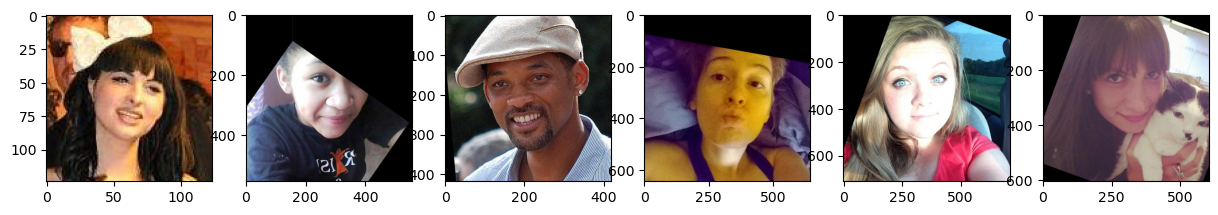

In [2]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

# Implement Closed Form Solution
```
Arguments:
    age          -- numpy array, shape (n, )
    features     -- numpy array, shape (n, 2048)
Returns:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [3]:
def closed_form_solution(age, features):
    # Preprocess
    H = features
    ones = np.ones(len(H))
    H = np.column_stack((ones, H))
    Y = age
    
    ##########################################################################
    # TODO: YOUR CODE HERE
    ##########################################################################

    # calculate the closed form solution
    weights = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(H), H)), np.transpose(H)), Y)

    # separate the weights and bias
    bias = weights[0]
    weights = weights[1:]
    
    return weights, bias

# Validate

Your validate loss is: 67.84


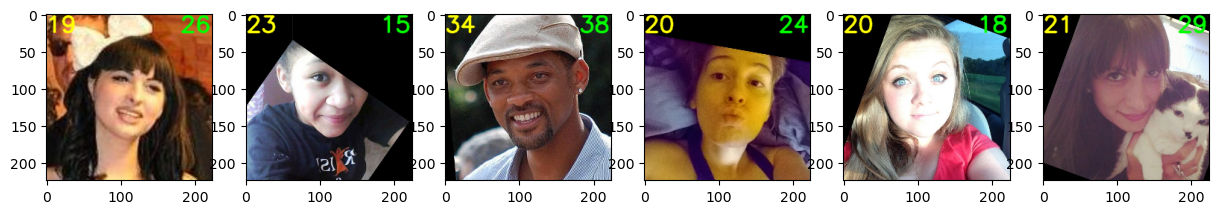

In [4]:
w, b = closed_form_solution(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate loss is:", round(loss, 3))

# Test and Generate results file

In [5]:
prediction = test(w, b, features_test, 'cfs.txt')
print("Test results has saved to cfs.txt")
print(prediction[:10])

Test results has saved to cfs.txt
[[28.0463996 ]
 [60.90374512]
 [55.19594972]
 [23.35683532]
 [35.20122173]
 [34.36335507]
 [36.63257246]
 [44.11504403]
 [18.49147777]
 [57.60077166]]


# Implement Gradient descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [6]:
def gradient_descent(age, feature):
    assert len(age) == len(feature)

    # Init weights and bias
    weights = np.random.randn(2048, 1)
    bias = np.random.randn(1, 1)
    
    # Learning rate
    lr = 10e-3

    global features_val, age_val
    best_loss = float('inf')
    best_weights = weights
    best_bias = bias
    m = len(age)
    
    for e in range(epoch):
        ##########################################################################
        # TODO: YOUR CODE HERE
        ##########################################################################

        # forward pass
        age_pred = np.dot(feature, weights) + bias

        # calculate loss
        diff = age_pred - age.reshape(-1, 1)
        
        # calculate gradient
        grad_w = np.dot(np.transpose(feature), diff) / m
        grad_b = np.sum(diff) / m

        # update weights
        weights -= lr * grad_w
        bias -= lr * grad_b
        
        if momentum:
            pass    # You  can also consider the gradient descent with momentum

        loss_val = np.sum(np.square(np.dot(features_val, weights) + bias - age_val.reshape(-1, 1))) / (2 * len(age_val))
        if loss_val < best_loss:
            best_loss = loss_val
            best_weights = weights
            best_bias = bias

    return best_weights, best_bias

# Train and validate

Your validate score is: 76.69


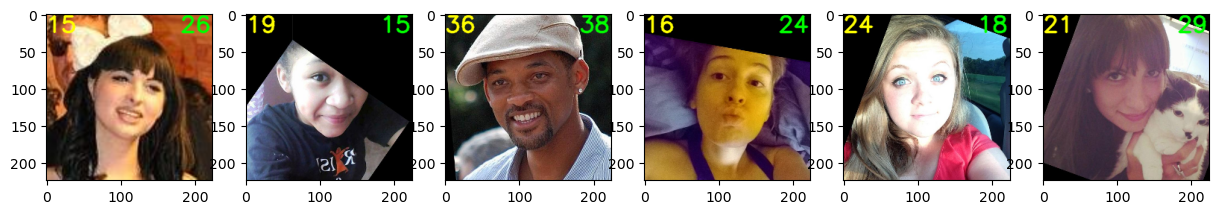

In [7]:
w, b = gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

#  Test and Generate results file

In [8]:
prediction = test(w, b, features_test, 'gd.txt')
print("Test results has saved to gd.txt")
print(prediction[:10])

Test results has saved to gd.txt
[[23.1648766 ]
 [76.61107637]
 [54.55480238]
 [23.85664576]
 [32.25724958]
 [29.34954974]
 [25.00904459]
 [38.55313733]
 [23.09036012]
 [52.54066864]]


# Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [9]:
def stochastic_gradient_descent(age, feature):
    # check the inputs
    assert len(age) == len(feature)
    
    # Set the random seed
    np.random.seed(0)

    # Init weights and bias
    weights = np.random.rand(2048, 1)
    bias = np.random.rand(1, 1)

    # Learning rate
    lr = 10e-5

    # Batch size
    batch_size = 16
 
    # Number of mini-batches
    t = len(age) // batch_size

    global features_val, age_val
    best_loss = float('inf')
    best_weights = weights
    best_bias = bias

    for e in range(epoch_sgd):
        # Shuffle training data
        n = np.random.permutation(len(feature))
        
        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            batch_feature = feature[n[m * batch_size: (m+1) * batch_size]]
            batch_age = age[n[m * batch_size: (m+1) * batch_size]]
            
            ##########################################################################
            # TODO: YOUR CODE HERE
            ##########################################################################

            # forward pass
            age_pred = np.dot(batch_feature, weights) + bias

            # calculate loss
            diff = age_pred - batch_age.reshape(-1, 1)

            # calculate gradient
            grad_w = np.dot(np.transpose(batch_feature), diff) / batch_size
            grad_b = np.sum(diff) / batch_size

            # update weights
            weights -= lr * grad_w
            bias -= lr * grad_b
                
            if momentum:
                pass    # You can also consider the gradient descent with momentum
        
        print('=> epoch:', e + 1, '  Loss:', round(loss, 4))

        loss_val = np.sum(np.square(np.dot(features_val, weights) + bias - age_val.reshape(-1, 1))) / (2 * len(age_val))
        if loss_val < best_loss:
            best_loss = loss_val
            best_weights = weights
            best_bias = bias

    return best_weights, best_bias

# Train and validate

=> epoch: 1   Loss: 76.6905
=> epoch: 2   Loss: 76.6905
=> epoch: 3   Loss: 76.6905
=> epoch: 4   Loss: 76.6905
=> epoch: 5   Loss: 76.6905
=> epoch: 6   Loss: 76.6905
=> epoch: 7   Loss: 76.6905
=> epoch: 8   Loss: 76.6905
=> epoch: 9   Loss: 76.6905
=> epoch: 10   Loss: 76.6905
=> epoch: 11   Loss: 76.6905
=> epoch: 12   Loss: 76.6905
=> epoch: 13   Loss: 76.6905
=> epoch: 14   Loss: 76.6905
=> epoch: 15   Loss: 76.6905
=> epoch: 16   Loss: 76.6905
=> epoch: 17   Loss: 76.6905
=> epoch: 18   Loss: 76.6905
=> epoch: 19   Loss: 76.6905
=> epoch: 20   Loss: 76.6905
=> epoch: 21   Loss: 76.6905
=> epoch: 22   Loss: 76.6905
=> epoch: 23   Loss: 76.6905
=> epoch: 24   Loss: 76.6905
=> epoch: 25   Loss: 76.6905
=> epoch: 26   Loss: 76.6905
=> epoch: 27   Loss: 76.6905
=> epoch: 28   Loss: 76.6905
=> epoch: 29   Loss: 76.6905
=> epoch: 30   Loss: 76.6905
=> epoch: 31   Loss: 76.6905
=> epoch: 32   Loss: 76.6905
=> epoch: 33   Loss: 76.6905
=> epoch: 34   Loss: 76.6905
=> epoch: 35   Loss: 76

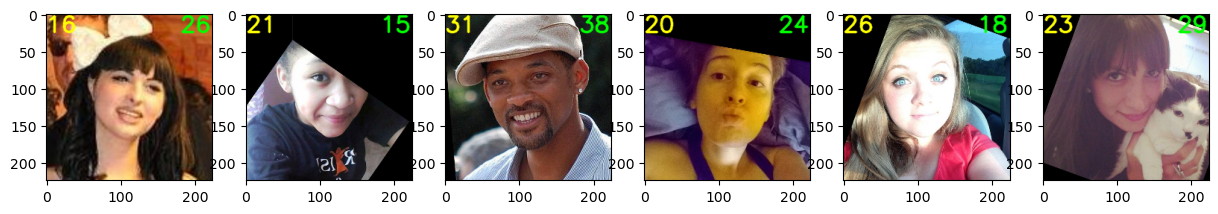

In [10]:
w, b = stochastic_gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

# Test and Generate results file

In [11]:
prediction = test(w, b, features_test, 'sgd.txt')
print("Test results has saved to sgd.txt")
print(prediction[:10])

Test results has saved to sgd.txt
[[26.4712843 ]
 [76.22092118]
 [54.08500022]
 [22.41484943]
 [33.50991962]
 [28.94436494]
 [28.32268237]
 [40.28594426]
 [22.82754715]
 [52.9453773 ]]
